In [34]:
import pandas as pd
import seaborn as sns
import numpy as np

from src import vehicular_data_columns, subject_data_columns, neurophysiological_data_columns, video_data_analysis_columns
from src.preprocess import remove_invalid_data

In [11]:
DATA_PATH = "../data/"

feature_track_path = DATA_PATH + "Feature_Track.xlsx"
feature_simulation_path = DATA_PATH + "Feature_Simulation.xlsx"

In [12]:
# Reading the datasets
feature_track_df = pd.read_excel(feature_track_path)
feature_simulation_df = pd.read_excel(feature_simulation_path)

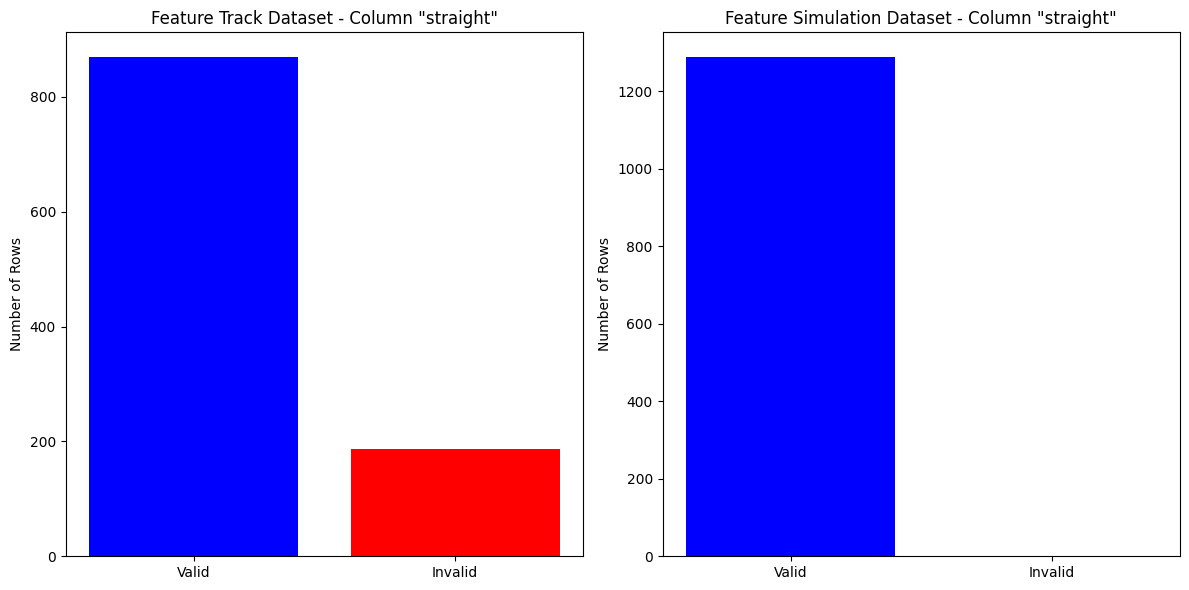

In [13]:
import matplotlib.pyplot as plt

# Checking for invalid values in 'straight' column for both datasets
# Valid values are either 0 or 1
invalid_straight_track = feature_track_df[~feature_track_df['straight'].isin([0, 1])]
invalid_straight_simulation = feature_simulation_df[~feature_simulation_df['straight'].isin([0, 1])]

# Counting valid and invalid rows for 'straight' column in both datasets
valid_invalid_counts_track = {'Valid': len(feature_track_df) - len(invalid_straight_track), 'Invalid': len(invalid_straight_track)}
valid_invalid_counts_simulation = {'Valid': len(feature_simulation_df) - len(invalid_straight_simulation), 'Invalid': len(invalid_straight_simulation)}

# Plotting the results in a bar plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(valid_invalid_counts_track.keys(), valid_invalid_counts_track.values(), color=['blue', 'red'])
ax[0].set_title('Feature Track Dataset - Column "straight"')
ax[0].set_ylabel('Number of Rows')

ax[1].bar(valid_invalid_counts_simulation.keys(), valid_invalid_counts_simulation.values(), color=['blue', 'red'])
ax[1].set_title('Feature Simulation Dataset - Column "straight"')
ax[1].set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()

In [14]:
# Function to calculate valid and invalid rows for each column in a DataFrame
def calculate_valid_invalid_rows(df):
    valid_invalid_counts = {}
    for column in df.columns:
        valid_count = df[column].notna().sum()
        invalid_count = df[column].isna().sum()
        if invalid_count > 0:  # Only consider columns with invalid (NaN) values
            valid_invalid_counts[column] = {'Valid': valid_count, 'Invalid': invalid_count}
    return valid_invalid_counts

# Calculate valid and invalid rows for both datasets
valid_invalid_counts_track = calculate_valid_invalid_rows(feature_track_df)
valid_invalid_counts_simulation = calculate_valid_invalid_rows(feature_simulation_df)

# Display the results
valid_invalid_counts_track, valid_invalid_counts_simulation

({'max_speed': {'Valid': 1012, 'Invalid': 44},
  'avg_speed': {'Valid': 1012, 'Invalid': 44},
  'std_speed': {'Valid': 1012, 'Invalid': 44},
  'hr': {'Valid': 711, 'Invalid': 345},
  'hrv_lf': {'Valid': 711, 'Invalid': 345},
  'hrv_hf': {'Valid': 711, 'Invalid': 345},
  'hrv_lfhf_ratio': {'Valid': 711, 'Invalid': 345},
  'gsr_tonic': {'Valid': 816, 'Invalid': 240},
  'gsr_phasic': {'Valid': 816, 'Invalid': 240},
  'gsr_peaks': {'Valid': 816, 'Invalid': 240},
  'EBRmean': {'Valid': 717, 'Invalid': 339},
  'BDmean': {'Valid': 715, 'Invalid': 341},
  'ThetaFrontal': {'Valid': 809, 'Invalid': 247},
  'ThetaParietal': {'Valid': 809, 'Invalid': 247},
  'AlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'AlphaParietal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'LowerAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaFrontal': {'Valid': 809, 'Invalid': 247},
  'UpperAlphaParietal': {'Valid': 809, 'Invalid': 247},
  'BetaFrontal': {'Valid

In [15]:
# Example usage
cleaned_feature_track = remove_invalid_data(
    feature_track_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

cleaned_feature_simulation = remove_invalid_data(
    feature_simulation_df,
    columns_with_defined_valid_values={'straight': [0, 1]},
)

In [16]:
cleaned_feature_track = cleaned_feature_track.drop(columns=["Unnamed: 0"])
cleaned_feature_track

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
1,0AC2A4,1,27,1,0,1,0,1,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,0AC2A4,1,33,1,0,0,1,1,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,0AC2A4,1,43,1,1,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,0AC2A4,1,58,1,1,0,0,0,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762
5,0AC2A4,1,100,1,0,0,0,0,1,0,...,0.25684,0.14480,0.14691,0.13539,0.03894,0.02784,0.04989,0.04311,0.03223,0.01851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,8924EA,7,34,0,0,1,1,0,0,0,...,0.12229,0.09790,0.09598,0.06669,0.01560,0.01280,0.02259,0.01996,0.01113,0.00853
1048,8924EA,7,39,1,0,0,0,0,0,0,...,0.07144,0.06057,0.04700,0.04750,0.01564,0.01582,0.02689,0.02627,0.00868,0.00944
1049,8924EA,7,57,1,0,0,0,0,1,0,...,0.08088,0.07371,0.04604,0.04563,0.01604,0.01400,0.02659,0.02390,0.00948,0.00785
1050,8924EA,7,99,0,0,0,0,1,0,0,...,0.10211,0.09497,0.04877,0.06143,0.01402,0.01226,0.02569,0.02228,0.00680,0.00593


In [18]:
one_hot_encoded = pd.get_dummies(cleaned_feature_track['subject'], prefix='car')
cleaned_feature_track = pd.concat([cleaned_feature_track, one_hot_encoded], axis=1).drop('subject', axis=1)

In [19]:
# Calculate correlation matrix
correlation_matrix = cleaned_feature_track.corr()

# Isolate the correlations with risk_outcome
risk_correlation = correlation_matrix[['risk_outcome']].sort_values(by='risk_outcome', key=abs, ascending=False)

print(risk_correlation)


                               risk_outcome
risk_outcome                       1.000000
habituation                       -0.562495
car_F9D528                         0.473163
car_D4F190                         0.473163
car_144282                         0.445682
...                                     ...
gaze_complete_expl                      NaN
gaze_partial_expl                       NaN
gaze_poor_expl                          NaN
distraction_na                          NaN
distraction_reduced_attention           NaN

[102 rows x 1 columns]


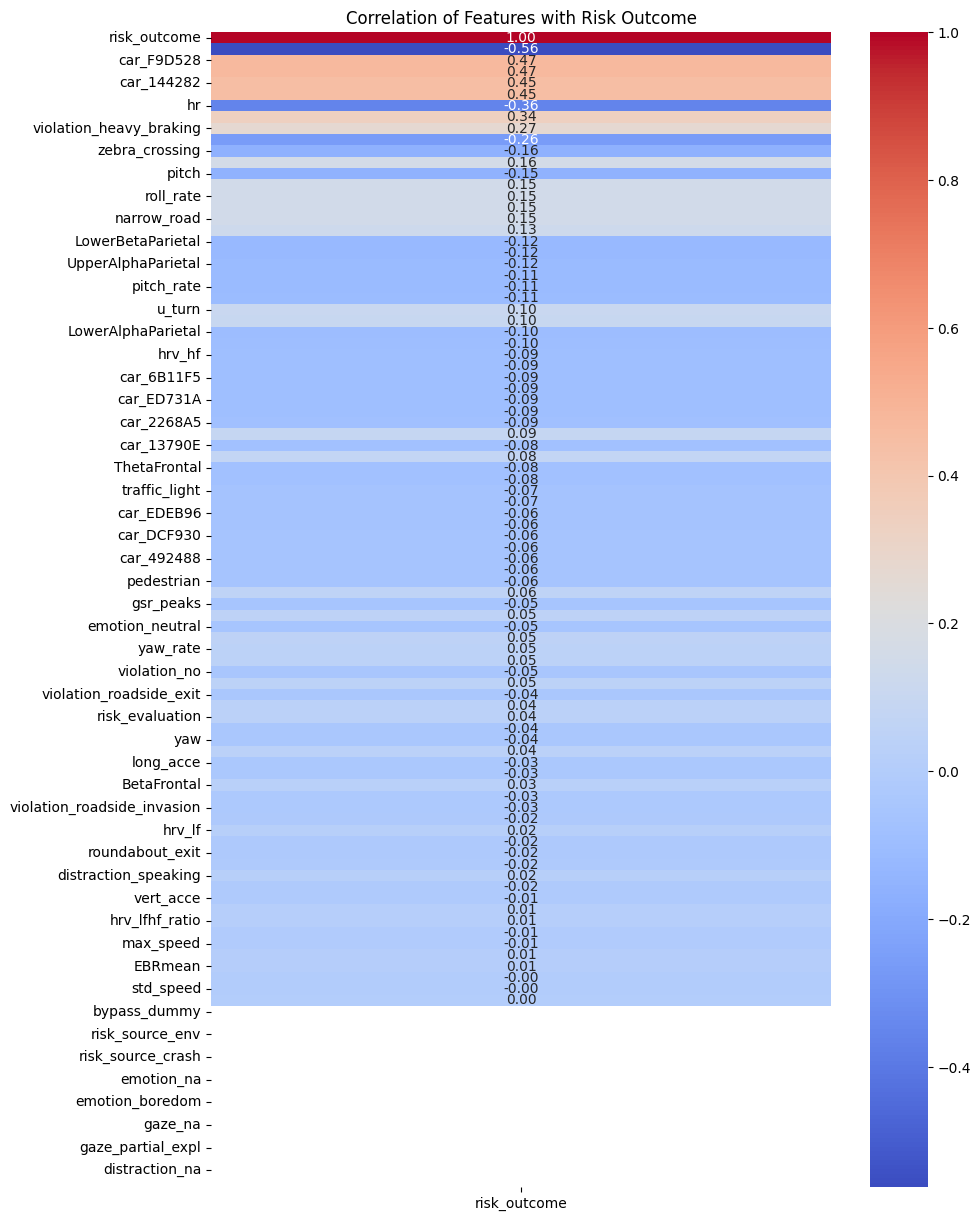

In [22]:
# Plot the correlations with risk_outcome
plt.figure(figsize=(10, 15))
sns.heatmap(risk_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Risk Outcome')
plt.show()


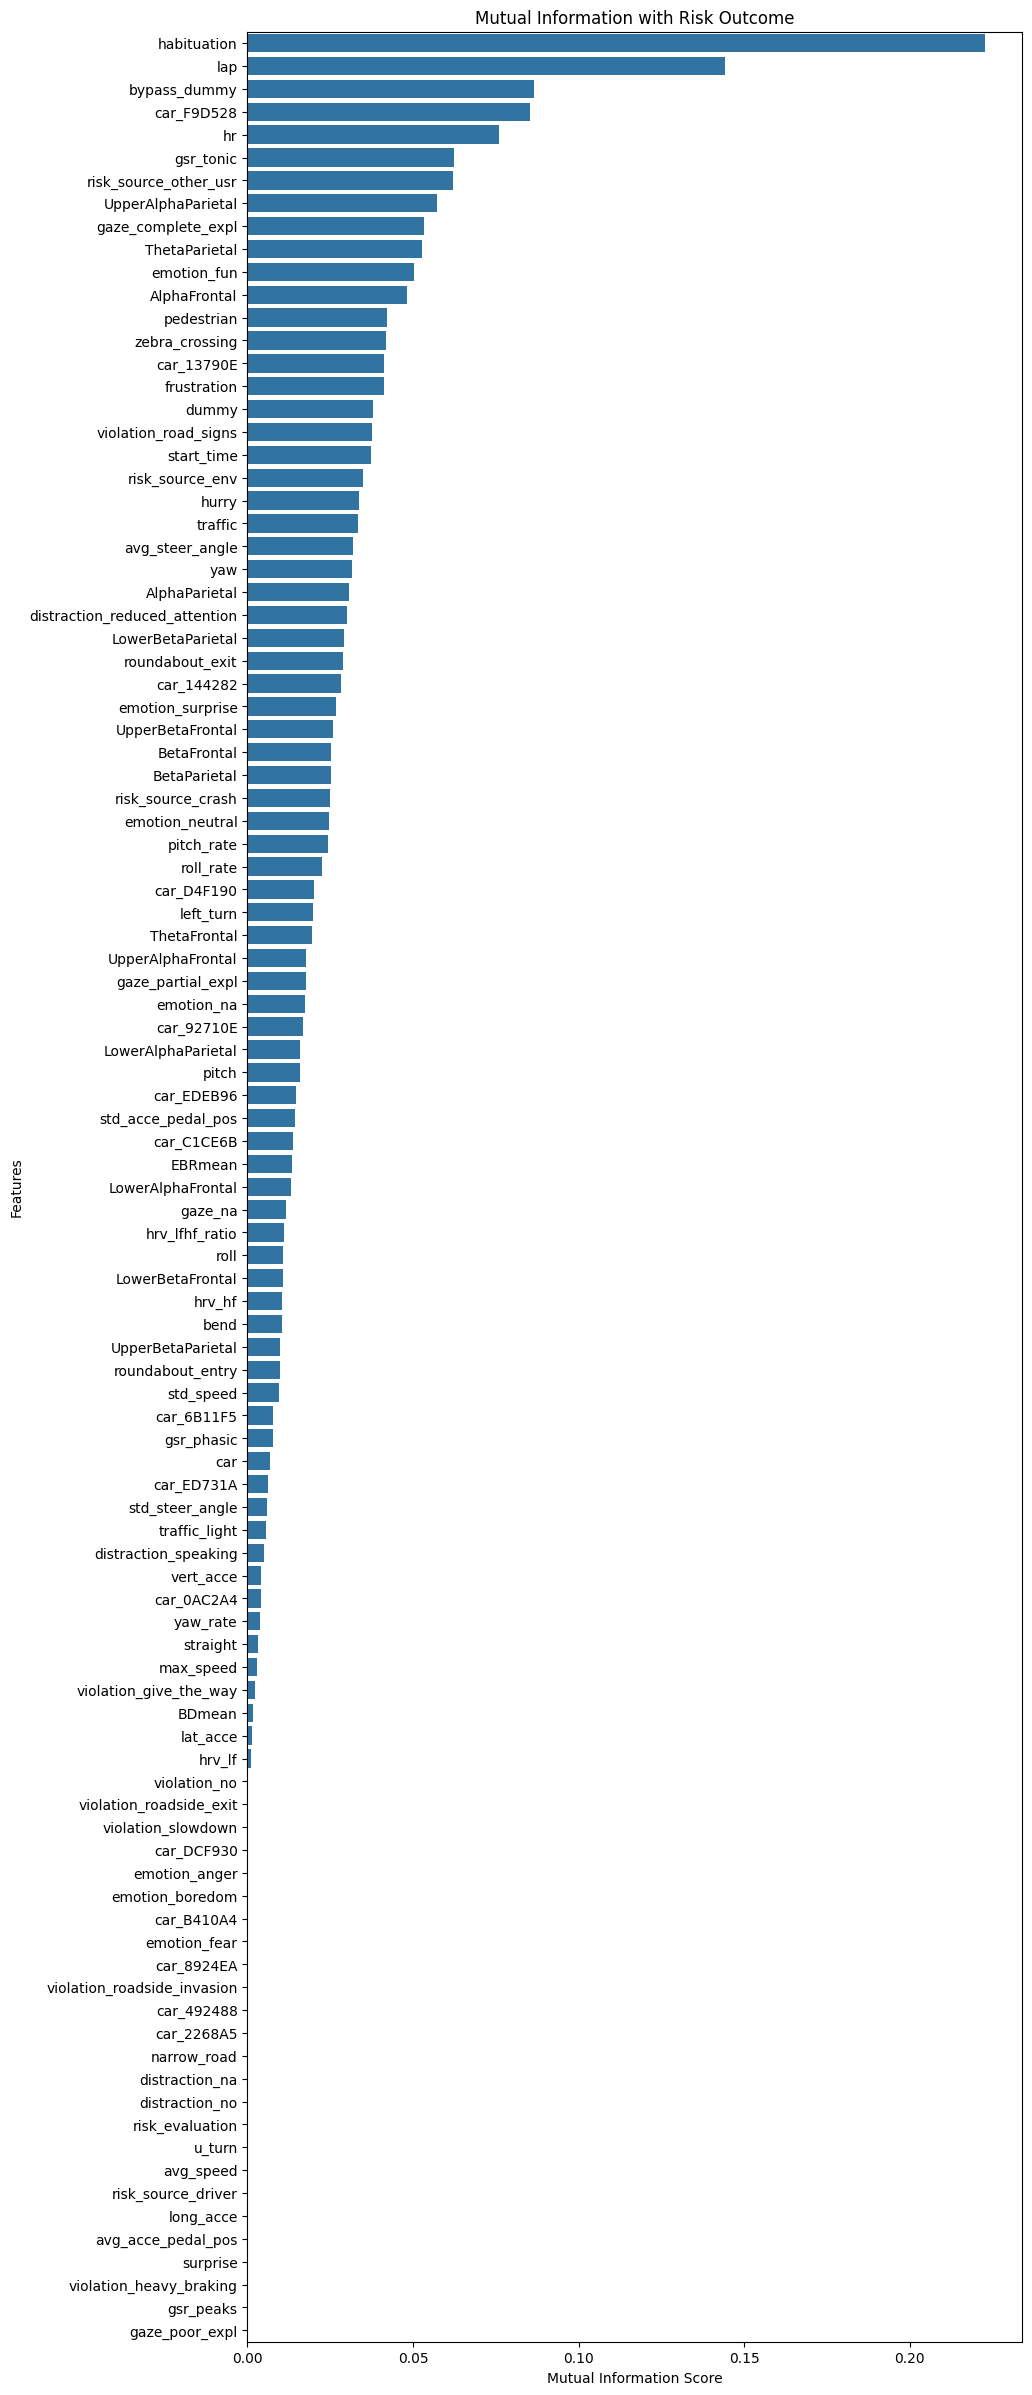

Top 10 Features based on Mutual Information Scores:
habituation              0.222918
lap                      0.144281
bypass_dummy             0.086664
car_F9D528               0.085322
hr                       0.075894
gsr_tonic                0.062522
risk_source_other_usr    0.061947
UpperAlphaParietal       0.057274
gaze_complete_expl       0.053228
ThetaParietal            0.052687
emotion_fun              0.050179
AlphaFrontal             0.048165
pedestrian               0.042056
zebra_crossing           0.041868
car_13790E               0.041348
frustration              0.041310
dummy                    0.037934
violation_road_signs     0.037500
start_time               0.037394
risk_source_env          0.035030
dtype: float64
<class 'pandas.core.series.Series'>


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression


def selection_top_features(number_of_features=20):
    X = cleaned_feature_track.drop('risk_outcome', axis=1)
    y = cleaned_feature_track['risk_outcome']

    # Calculate mutual information
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns)

    # Remove features starting with "car_" or "Car_"
    mi_series = mi_series[~mi_series.index.str.startswith('car_') & ~mi_series.index.str.startswith('Car_')]

    # Sort the series after filtering
    mi_series = mi_series.sort_values(ascending=False)

    # Plotting
    plt.figure(figsize=(10, 30))
    sns.barplot(x=mi_series.values, y=mi_series.index)
    plt.title('Mutual Information with Risk Outcome')
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.show()

    # Get top 10 features based on mutual information scores after filtering
    top_features = mi_series.head(number_of_features)
    return top_features

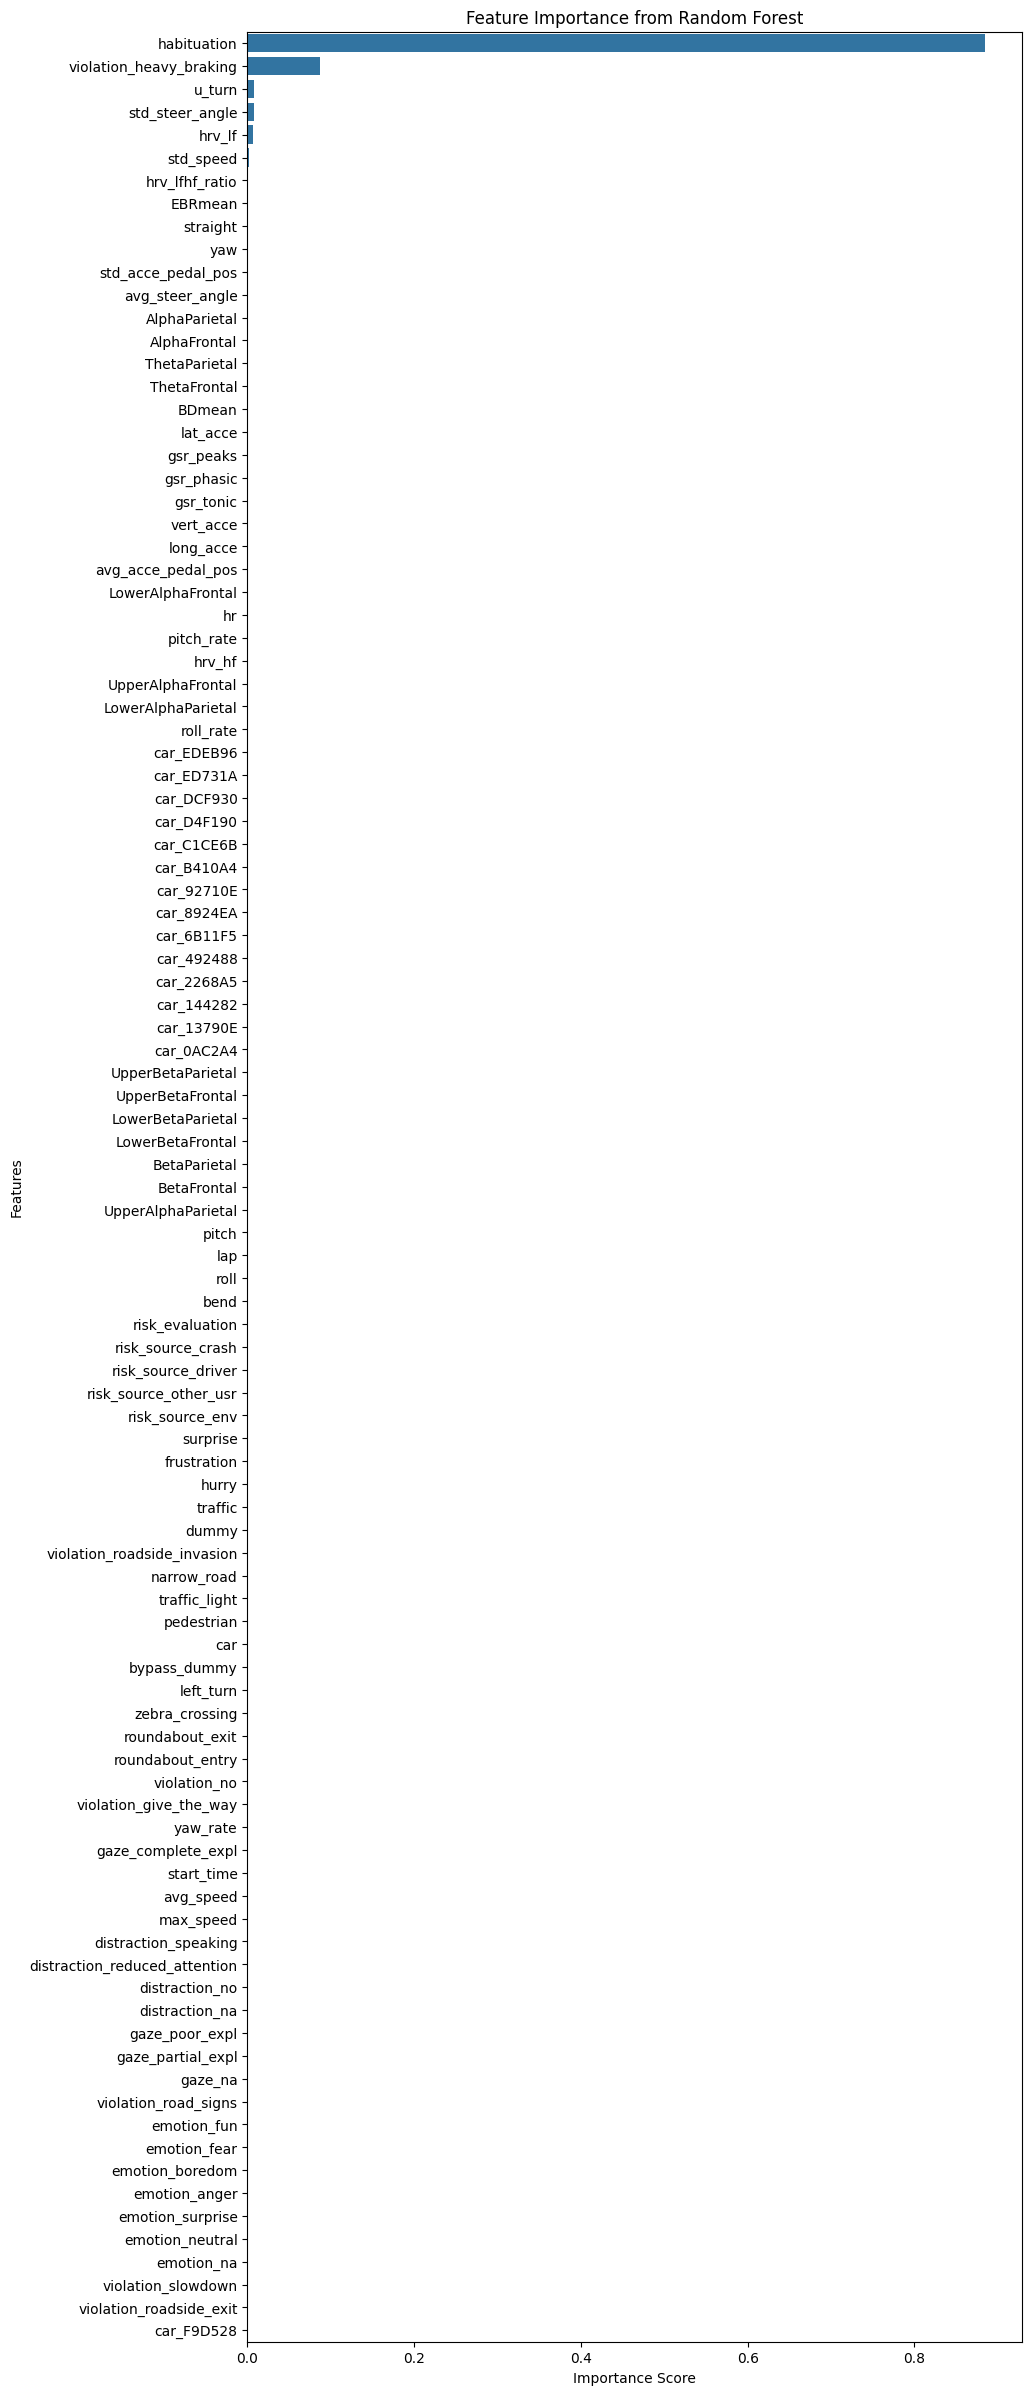

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 30))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


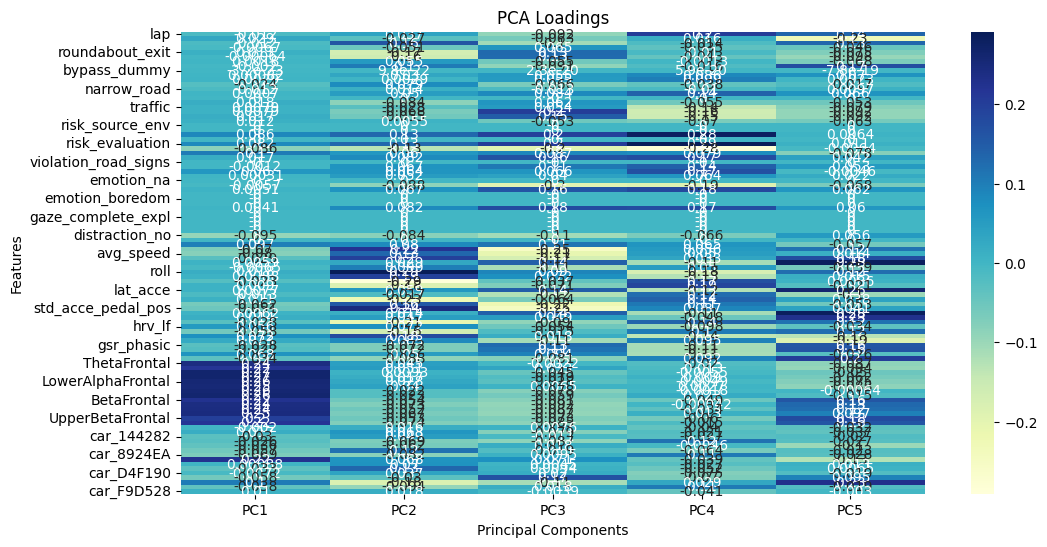

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)  # Adjust based on your interest
pca.fit(X_scaled)
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(5)])

# Plotting
plt.figure(figsize=(12, 6))
sns.heatmap(loadings.transpose(), cmap='YlGnBu', annot=True)
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


C:\Users\iulhaq\Desktop\hackathon\.hack\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\iulhaq\Desktop\hackathon\.hack\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


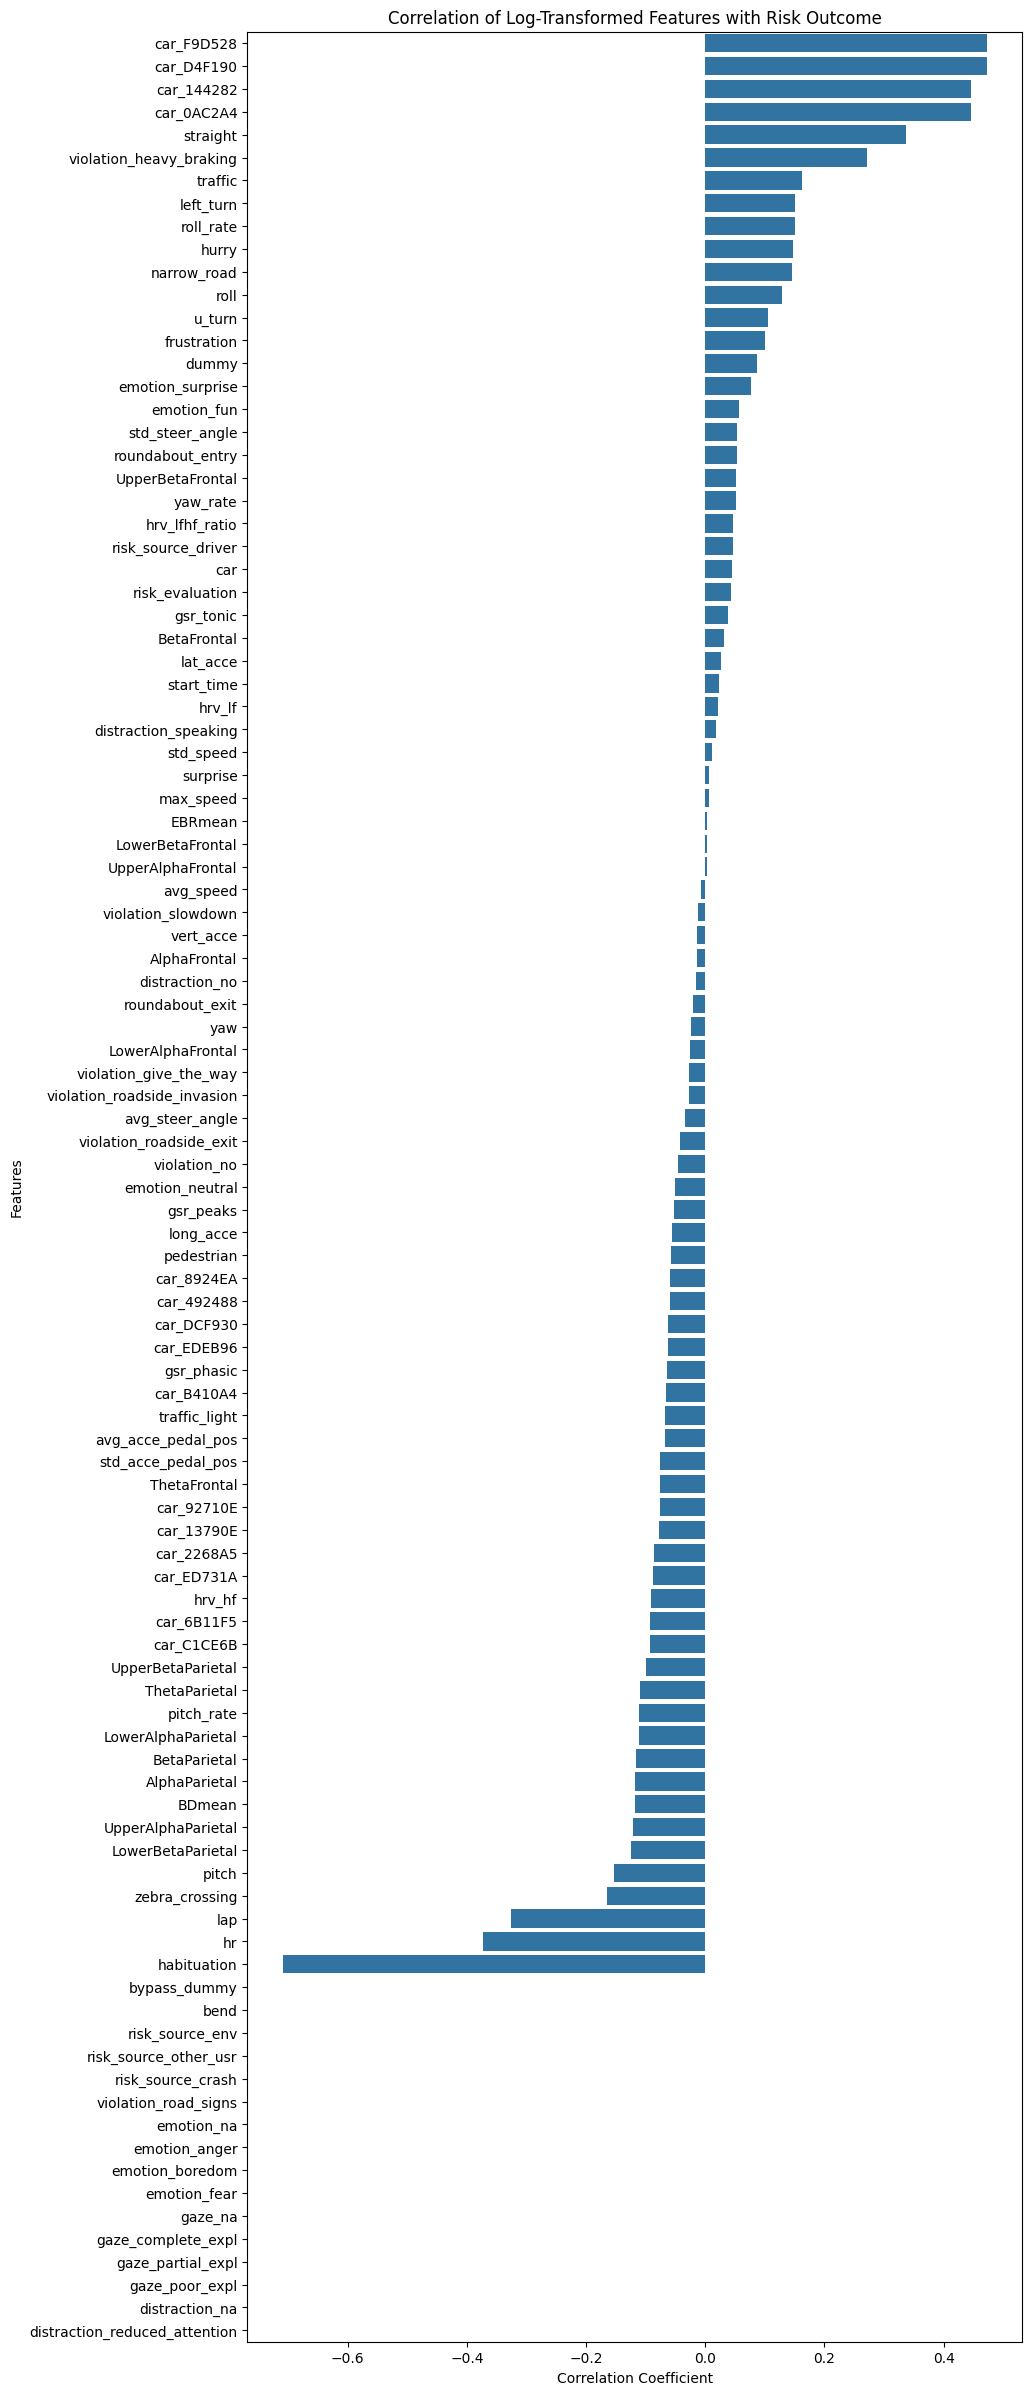

In [35]:
X_transformed = X.apply(np.log1p)  # Assuming log transformation is applicable
correlation_matrix_transformed = X_transformed.corrwith(y).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 30))
sns.barplot(x=correlation_matrix_transformed.values, y=correlation_matrix_transformed.index)
plt.title('Correlation of Log-Transformed Features with Risk Outcome')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()
